In [1]:
import torch
torch.cuda.is_available()

True

In [3]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import numpy as np

In [4]:
X_label='Train_EnvstepsSoFar'
Y_label='Train_AverageReturn'
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y

def getXY(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    logdir = '/home/harvey/Documents/cs285/homework_fall2022/hw4/data/%s/events*'%exp_name
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
    return X, Y

def check(exp_name):
    X, Y = getXY(exp_name)
    for i, (x, y) in enumerate(zip(X, Y)):
        print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [1]:
q2name = "hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_02-11-2022_00-21-04"

# HW4 Report

## Problem 1

### q1_cheetah_n5_arch2x250
![title](../../data/hw4_q1_cheetah_n5_arch2x250_cheetah-cs285-v0_02-11-2022_00-16-56/itr_0_predictions.png)
### q1_cheetah_n500_arch1x32
![title](../../data/hw4_q1_cheetah_n500_arch1x32_cheetah-cs285-v0_01-11-2022_11-42-29/itr_0_predictions.png)
### q1_cheetah_n500_arch2x250
![title](../../data/hw4_q1_cheetah_n500_arch2x250_cheetah-cs285-v0_02-11-2022_00-17-03/itr_0_predictions.png)

The last model performs the best because we have a large enough model with more training iterations

## Problem 2

Text(0.5, 1.0, 'Problem 2')

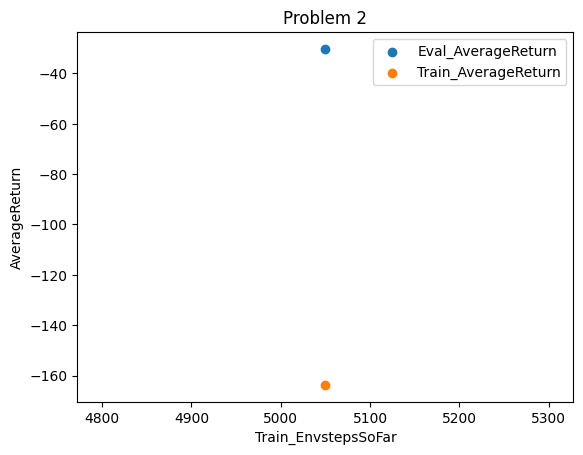

In [10]:
X_label='Train_EnvstepsSoFar'
Y1_label='Eval_AverageReturn'
Y2_label='Train_AverageReturn'

exp_names = [q2name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y1_label)
    X2, Y2 = getXY(exp_name, X_label=X_label, Y_label=Y2_label)
    plt.scatter(X1, Y1, label=Y1_label)
    plt.scatter(X2, Y2, label=Y2_label)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 2")

## Question 3

## Question 4: Sanity check with Cartpole

## Question 5

## Question 6: Run soft actor-critic more difficult tasks.

Text(0.5, 1.0, 'Question 6')

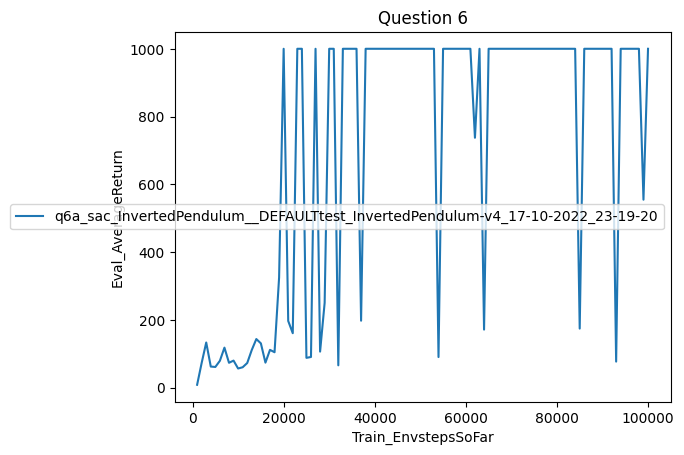

In [37]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
# Y_label='Train_AverageReturn'
exp_names = [q61name]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 6")

Text(0.5, 1.0, 'Question 6')

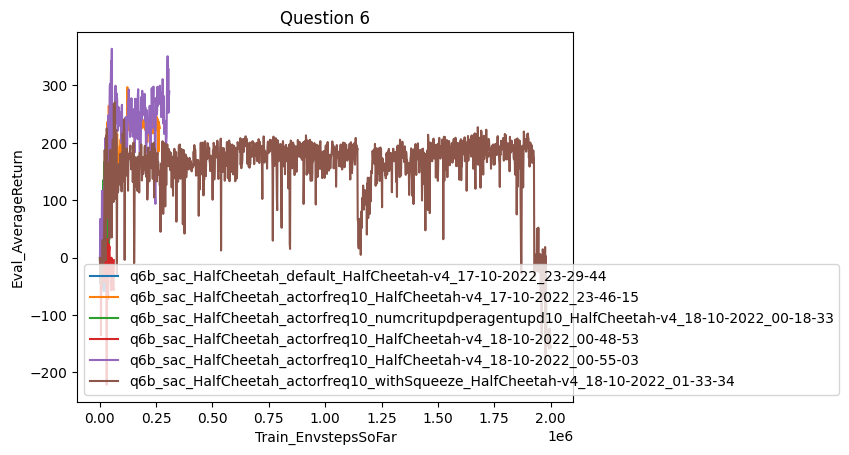

In [21]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
# Y_label='Train_AverageReturn'
exp_names = [q62name, q63name, q64name, q65name, q66name, q6weird]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Question 6")

# Additional Tests

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Text(0.5, 1.0, 'Question 6')

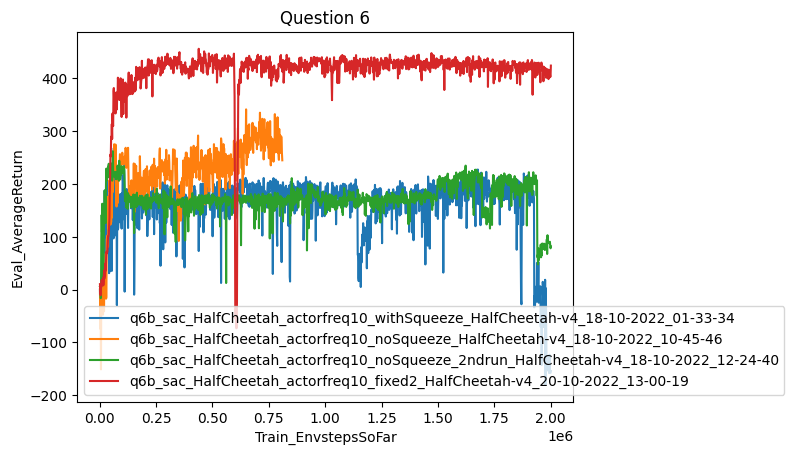

In [4]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'
# Y_label='Train_AverageReturn'
exp_names = [q6weird, q6nosqueeze1, q6nosqueeze2, q6fixed2]

for exp_name in exp_names:
    X1, Y1 = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X1, Y1, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()
plt.title("Question 6")